In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from itertools import permutations
from tqdm import tqdm

from params import *

In [4]:
result_path = 'results/results_tuned0_2.pkl'
with open(result_path, 'rb') as f:
    results = pickle.load(f)

In [5]:
def expand_synaptic_strength(synaptic_strengths, n_neurons):
    results = np.zeros((n_neurons, n_neurons))
    for i, j in list(permutations(range(n_neurons), 2)):
        results[i, j] = synaptic_strengths[i*n_neurons + j] / nS
    return results

In [6]:
synaptic_after = expand_synaptic_strength(results['weights_rec'], 400)
synaptic_before = expand_synaptic_strength(results['weights_rec_start'], 400)

In [22]:
w_max = np.max(np.abs(synaptic_after))
w_max_before = np.max(np.abs(synaptic_before))

In [24]:
def plot_w_hist(synaptic_strength, w_max):
    tuned_vertical = synaptic_strength[np.triu_indices(100, 1)]
    others_vertical = synaptic_strength[0:100, 100:].flatten()

    tuned_45 = synaptic_strength[(np.triu_indices(100,1)[0]+100, np.triu_indices(100,1)[1]+100)]
    others_45 = np.concatenate((synaptic_strength[0:100, 100:200].flatten(), synaptic_strength[100:200, 200:].flatten()))
    
    tuned_horizontal = synaptic_strength[(np.triu_indices(100,1)[0]+200, np.triu_indices(100,1)[1]+200)]
    others_horizontal = np.concatenate((synaptic_strength[0:200, 200:300].flatten(), synaptic_strength[200:300, 300:].flatten()))
    
    tuned_135 = tuned_horizontal = synaptic_strength[(np.triu_indices(100,1)[0]+300, np.triu_indices(100,1)[1]+300)]
    mask = np.triu(np.ones(400), k=1)
    mask[(np.triu_indices(100,1)[0]+300, np.triu_indices(100,1)[1]+300)] = False
    others_135 = synaptic_strength[0:300, 300:400].flatten()
    
    fig = plt.figure(figsize=(20, 14))
    plt.subplot(2,4,1)
    sns.histplot(tuned_vertical, binrange=(0, w_max), stat='probability')
    plt.ylim(0, 0.5)
    plt.title('| to |')
    plt.subplot(2,4,2)
    sns.histplot(tuned_45, binrange=(0, w_max), stat='probability')
    plt.ylim(0, 0.5)
    plt.title('/ to /')
    plt.subplot(2,4,3)
    sns.histplot(tuned_horizontal, binrange=(0, w_max), stat='probability')
    plt.ylim(0, 0.5)
    plt.title('-- to --')
    plt.subplot(2,4,4)
    sns.histplot(tuned_135, binrange=(0, w_max), stat='probability')
    plt.ylim(0, 0.5)
    plt.title('\\ to \\')
    plt.subplot(2,4,5)
    sns.histplot(others_vertical, binrange=(0, w_max), stat='probability')
    plt.ylim(0, 0.5)
    plt.title('| to others')
    plt.subplot(2,4,6)
    sns.histplot(others_45, binrange=(0, w_max), stat='probability')
    plt.ylim(0, 0.5)
    plt.title('/ to others')
    plt.subplot(2,4,7)
    sns.histplot(others_horizontal, binrange=(0, w_max), stat='probability')
    plt.ylim(0, 0.5)
    plt.title('-- to others')
    plt.subplot(2,4,8)
    sns.histplot(others_135, binrange=(0, w_max), stat='probability')
    plt.ylim(0, 0.5)
    plt.title('\\ to others')
    return np.mean(tuned_vertical), np.mean(others_vertical), np.mean(tuned_45), np.mean(others_45), np.mean(tuned_horizontal), np.mean(others_horizontal), np.mean(tuned_135), np.mean(others_135)

([<matplotlib.axis.YTick at 0x7fccd0c3dca0>,
 [Text(0, 0, '|'), Text(0, 100, '/'), Text(0, 200, '--'), Text(0, 300, '\\')])

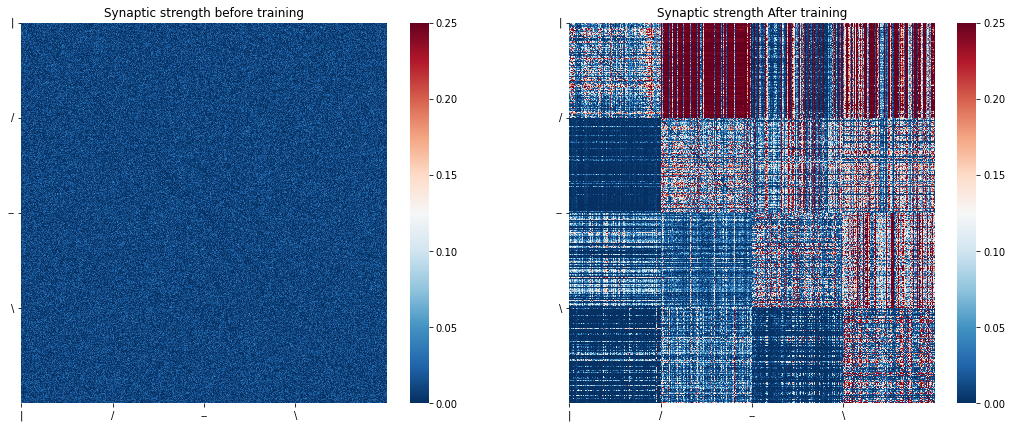

In [8]:
fig = plt.figure(figsize=(18, 7))
plt.subplot(1,2,1)
sns.heatmap(synaptic_before, cmap='RdBu_r', vmin=0, vmax=w_max).set_title("Synaptic strength before training")
plt.xticks([0,100,200,300], ['|', '/', '--', '\\'])
plt.xticks(rotation=0)
plt.yticks([0,100,200,300], ['|', '/', '--', '\\'])
plt.subplot(1,2,2)
sns.heatmap(synaptic_after, cmap='RdBu_r', vmin=0, vmax=w_max).set_title("Synaptic strength After training")
plt.xticks([0,100,200,300], ['|', '/', '--', '\\'])
plt.xticks(rotation=0)
plt.yticks([0,100,200,300], ['|', '/', '--', '\\'])

(0.010743717928701215,
 0.010813604318904305,
 0.010833155255558733,
 0.010827172846070198,
 0.010810729350694662,
 0.010845354344670285,
 0.010810729350694662,
 0.010823490831654538)

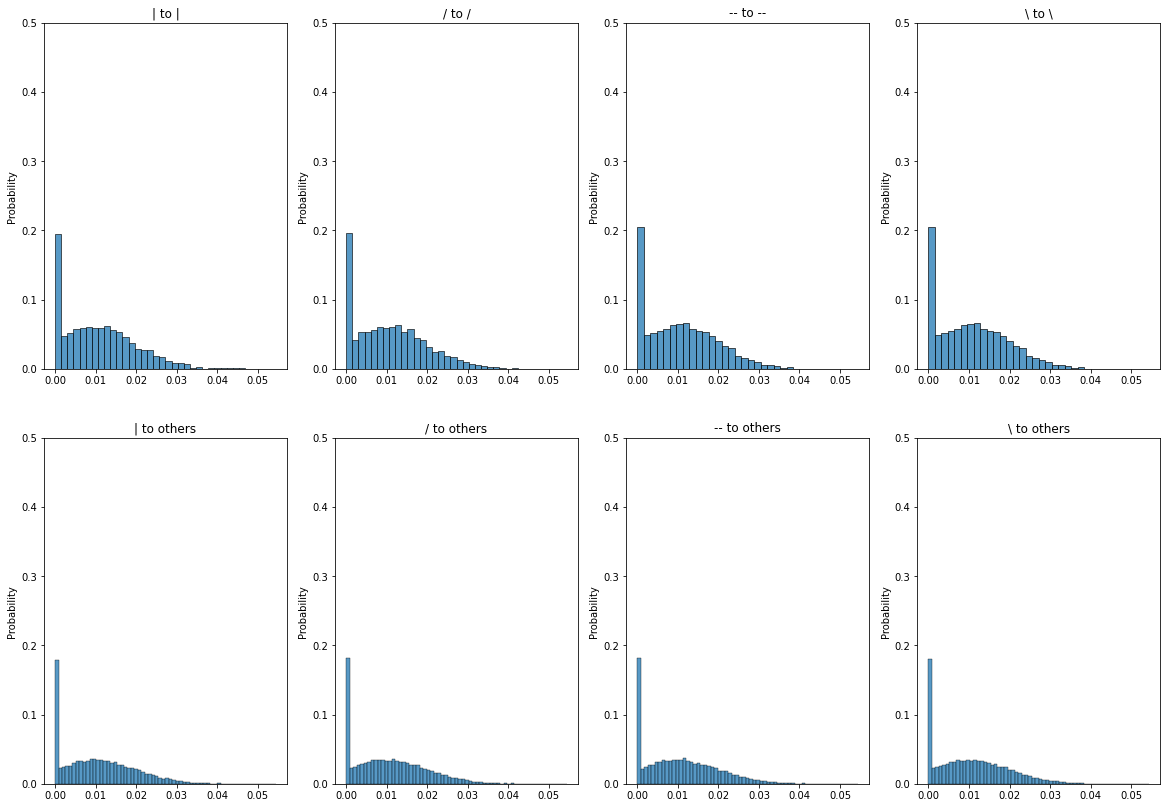

In [25]:
plot_w_hist(synaptic_before,w_max_before)

(0.07691657036008596,
 0.1538323900484051,
 0.0818633324663554,
 0.13273857966592978,
 0.08352651615403774,
 0.09947578035858666,
 0.08352651615403774,
 0.13400076364251626)

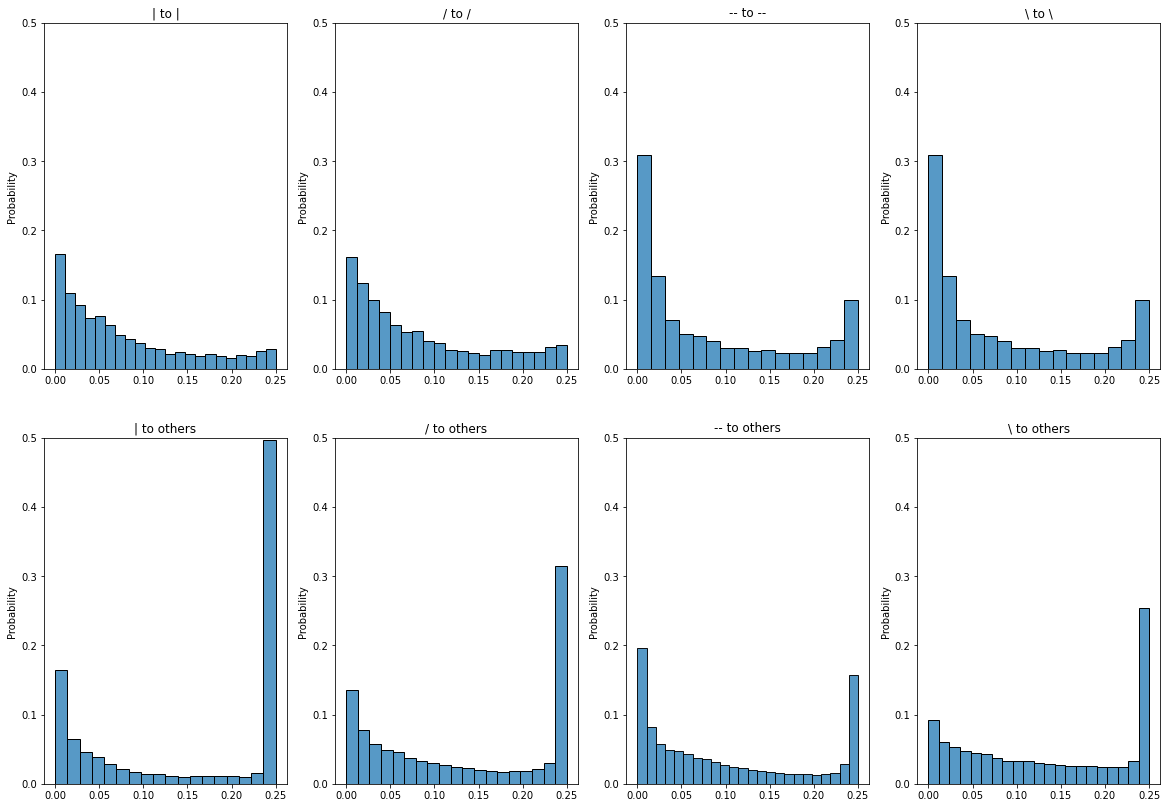

In [26]:
plot_w_hist(synaptic_after, w_max)